In [5]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [6]:
#Read in the csv file and convert to a Pandas dataframe
arwu_df = pd.read_excel('../data/shanghai Ranking.xlsx')
the_df = pd.read_excel('../data/Times Higher Education.xlsx')
cwur_df = pd.read_excel('../data/World Rank University.xlsx')

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [7]:
the_df.describe()

,sdg-score-multi__number,sdg-score-multi__number 2,sdg-score-multi__number 3,sdg-score-multi__number 5,sdg-score-multi__number 6,sdg-score-multi__number 7,sdg-score-multi__number 8
count,867.000000,826.000000,812.000000,565.000000,498.000000,439.000000,483.000000
mean,8.193772,8.446731,7.902709,5.488496,6.777108,7.596811,5.962733
std,4.240660,4.786111,4.403411,3.151375,3.230968,4.278980,3.346928
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000
50%,9.000000,8.000000,8.000000,5.000000,6.000000,7.000000,4.000000
75%,11.000000,12.000000,11.000000,8.000000,8.000000,10.000000,7.000000
max,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [8]:
"""
Data Source: The data appears to be sourced from Times Higher Education, 
which is a well-known and reputable organization for university rankings. This enhances its trustworthiness.
Collection Process: The sustainability scores (e.g., SDG scores) suggest a detailed methodology, 
but verifying the original data collection process from THE (e.g., which SDGs were evaluated and how the scores were calculated) would ensure reliability.
"""

'\nData Source: The data appears to be sourced from Times Higher Education, \nwhich is a well-known and reputable organization for university rankings. This enhances its trustworthiness.\nCollection Process: The sustainability scores (e.g., SDG scores) suggest a detailed methodology, \nbut verifying the original data collection process from THE (e.g., which SDGs were evaluated and how the scores were calculated) would ensure reliability.\n'

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [9]:
"""
The dataset doesn't include a specific timestamp, but the problem statement didn't require time-based analysis.
"""

"\nThe dataset doesn't include a specific timestamp, but the problem statement didn't require time-based analysis.\n"

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [10]:
"""
To ensure consistency, we will compare universities that appear across multiple datasets.
For example, if Harvard University ranks 1st in the Shanghai Ranking, we will check if it holds a similar position in the other datasets.
Any discrepancies, such as differing values for the same university, will need to be identified and addressed.
"""

'\nTo ensure consistency, we will compare universities that appear across multiple datasets.\nFor example, if Harvard University ranks 1st in the Shanghai Ranking, we will check if it holds a similar position in the other datasets.\nAny discrepancies, such as differing values for the same university, will need to be identified and addressed.\n'

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [11]:
"""
The data appears relevant for our university ranking analysis, 
but we need to ensure that the variables included align with our analysis objectives. For instance, 
if we are focusing on academic performance, we might need to remove columns related to SDG scores, 
which may not be directly relevant. Additionally, we must confirm that the geographic focus of the rankings fits our needs.
"""

'\nThe data appears relevant for our university ranking analysis, \nbut we need to ensure that the variables included align with our analysis objectives. For instance, \nif we are focusing on academic performance, we might need to remove columns related to SDG scores, \nwhich may not be directly relevant. Additionally, we must confirm that the geographic focus of the rankings fits our needs.\n'

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [12]:
"""
We will need to check for and remove any duplicate entries. 
Since universities might be listed under slightly different names, 
ensuring uniqueness will be important to avoid skewing the results.
"""

'\nWe will need to check for and remove any duplicate entries. \nSince universities might be listed under slightly different names, \nensuring uniqueness will be important to avoid skewing the results.\n'

In [13]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [14]:
"""
The Times Higher Education dataset contains missing values in some SDG-related columns. 
We will assess how significant these missing values are and determine whether they impact our analysis. 
The other datasets appear more complete, but we will still perform a full check to ensure that no critical data is missing.
"""

'\nThe Times Higher Education dataset contains missing values in some SDG-related columns. \nWe will assess how significant these missing values are and determine whether they impact our analysis. \nThe other datasets appear more complete, but we will still perform a full check to ensure that no critical data is missing.\n'

In [15]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [16]:
"""
To ensure accuracy, we will validate key entries by comparing them with publicly available rankings or other trusted sources. 
Additionally, we will confirm that the data types are appropriate (e.g., numeric fields are truly numeric, and rankings are integers). 
Any outliers or unexpected values will be investigated to ensure they are not errors.
"""

'\nTo ensure accuracy, we will validate key entries by comparing them with publicly available rankings or other trusted sources. \nAdditionally, we will confirm that the data types are appropriate (e.g., numeric fields are truly numeric, and rankings are integers). \nAny outliers or unexpected values will be investigated to ensure they are not errors.\n'

In [17]:
# Remove any leading or trailing spaces from the column names in the DataFrame
the_df.columns = the_df.columns.str.strip()


In [18]:
# There is some values that have been placed in the wrong columns, so we need to fix this
# But first we need to add a new column between 'sdg-score-multi__value 3' & 'sdg-score-multi__value 4'
# and give it a value of 17 for the entire column because it's missing from the data provided
# see more https://www.timeshighereducation.com/impactrankings#


the_df.insert(the_df.columns.get_loc('sdg-score-multi__value 4'), 'sdg-score-multi__number 4', 17)

In [19]:
# Drop the column 'ranking-institution-title href' because it's not needed for this analysis given that it's an official link to the institution
the_df.drop('ranking-institution-title href', axis=1, inplace=True)

In [20]:
the_df[the_df['Location'] == 'Saudi Arabia'].shape

(25, 20)

In [21]:
# A sample that if we merged the dataframes, we would have missing values even with the 
the_df.iloc[ 1407 ,  : ]


Rank                                             1001+
University Name              University of Puthisastra
Location                                      Cambodia
sdg-score-multi__number                            NaN
sdg-score-multi__value                             NaN
sdg-score-multi__number 2                          8.0
sdg-score-multi__value 2                     35.7–48.3
sdg-score-multi__number 3                          NaN
sdg-score-multi__value 3                           NaN
sdg-score-multi__number 4                           17
sdg-score-multi__value 4                      1.5–45.2
scores                                        7.9–53.8
sdg-score-multi__number 5                          NaN
sdg-score-multi__value 5                           NaN
sdg-score-multi__number 6                          NaN
sdg-score-multi__value 6                           NaN
sdg-score-multi__number 7                          NaN
sdg-score-multi__value 7                           NaN
sdg-score-

![image-2.png](attachment:image-2.png)

In [22]:
# A sample that if we merged the dataframes, we would have missing values & wrong values
the_df.iloc[ 1528 ,  : ]

Rank                                                             1001+
University Name              Transport and Telecommunication Institute
Location                                                        Latvia
sdg-score-multi__number                                            NaN
sdg-score-multi__value                                             NaN
sdg-score-multi__number 2                                          NaN
sdg-score-multi__value 2                                           NaN
sdg-score-multi__number 3                                          NaN
sdg-score-multi__value 3                                           NaN
sdg-score-multi__number 4                                           17
sdg-score-multi__value 4                                      1.5–45.2
scores                                                        7.9–53.8
sdg-score-multi__number 5                                          8.0
sdg-score-multi__value 5                                     35.7–48.3
sdg-sc

![image.png](attachment:image.png)

In [23]:
#First we will extract the columns that are supposed to have the missing values
the_df_1 = the_df.loc[ : ,'sdg-score-multi__number' : 'sdg-score-multi__value 4']

In [24]:
#Then we will extract the columns that have the missing values
the_df_2 = the_df.loc[ : ,'sdg-score-multi__number 5' : ]

In [25]:
"""
Function to replace NaN values in the first dataframe using values from the second dataframe row by row.
It checks each element in the first dataframe and replaces NaN values with the first available non-NaN value 
from the corresponding row in the second dataframe, proceeding in order from left to right. After using a value 
from the second dataframe, it is marked as NaN to ensure it isn't reused in the same row.
"""
def replace_nan_sequentially(df1, df2):
    combined_df = df1.copy()  # Start with the first dataframe
    for i in range(len(combined_df)):
        # Iterate over the columns in df1 for each row
        for j in range(len(combined_df.columns)):
            if pd.isna(combined_df.iloc[i, j]):  # If the value is NaN
                # Find the first non-NaN value from df2 in the corresponding row
                replacement_value = df2.iloc[i].dropna().values
                if len(replacement_value) > 0:
                    combined_df.iloc[i, j] = replacement_value[0]
                    df2.iloc[i] = df2.iloc[i].apply(lambda x: np.nan if x == replacement_value[0] else x)
    return combined_df

In [26]:
#Testing the function to see if it works
the_df_1.sample(5, random_state=20)

,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__number 4,sdg-score-multi__value 4
557,NaN,NaN,NaN,NaN,NaN,NaN,17,75.6–81.7
1528,NaN,NaN,NaN,NaN,NaN,NaN,17,1.5–45.2
1175,NaN,NaN,1.0,23.3–38.1,3.0,1.0–32.0,17,1.5–45.2
379,NaN,NaN,2.0,75.8,8.0,62.4–66.3,17,70.6–75.5
530,9.0,73.0–87.2,NaN,NaN,5.0,56.1–61.4,17,53.4–61.0


In [27]:
#Testing the function to see if it works
the_df_2.sample(5, random_state=20)

,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
557,NaN,NaN,4.0,62.6–66.5,5.0,56.1–61.4,16.0,63.7–69.9
1528,8.0,35.7–48.3,NaN,NaN,NaN,NaN,5.0,34.4–43.6
1175,11.0,20.9–38.4,NaN,NaN,NaN,NaN,NaN,NaN
379,NaN,NaN,NaN,NaN,16.0,70.0–77.0,NaN,NaN
530,NaN,NaN,NaN,NaN,3.0,68.3–73.4,NaN,NaN


In [28]:
#Testing the function to see if it works
replace_nan_sequentially(the_df_1.sample(5, random_state=20), the_df_2.sample(5, random_state=20))

,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__number 4,sdg-score-multi__value 4
557,4.0,62.6–66.5,5.0,56.1–61.4,16.0,63.7–69.9,17,75.6–81.7
1528,8.0,35.7–48.3,5.0,34.4–43.6,NaN,NaN,17,1.5–45.2
1175,11.0,20.9–38.4,1.0,23.3–38.1,3.0,1.0–32.0,17,1.5–45.2
379,16.0,70.0–77.0,2.0,75.8,8.0,62.4–66.3,17,70.6–75.5
530,9.0,73.0–87.2,3.0,68.3–73.4,5.0,56.1–61.4,17,53.4–61.0


In [29]:
# Therefore our function works as expected
# Now we will use it to replace the missing values in the 'the_df' dataframe

In [30]:
the_df.sample(5, random_state=20)

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__number 4,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
557,401–600,University of Split,Croatia,NaN,NaN,NaN,NaN,NaN,NaN,17,75.6–81.7,66.9–72.6,NaN,NaN,4.0,62.6–66.5,5.0,56.1–61.4,16.0,63.7–69.9
1528,1001+,Transport and Telecommunication Institute,Latvia,NaN,NaN,NaN,NaN,NaN,NaN,17,1.5–45.2,7.9–53.8,8.0,35.7–48.3,NaN,NaN,NaN,NaN,5.0,34.4–43.6
1175,1001+,Federal University of Paraí­ba (UFPB),Brazil,NaN,NaN,1.0,23.3–38.1,3.0,1.0–32.0,17,1.5–45.2,7.9–53.8,11.0,20.9–38.4,NaN,NaN,NaN,NaN,NaN,NaN
379,301–400,Public University of Navarre,Spain,NaN,NaN,2.0,75.8,8.0,62.4–66.3,17,70.6–75.5,72.7–76.7,NaN,NaN,NaN,NaN,16.0,70.0–77.0,NaN,NaN
530,401–600,University of Pisa,Italy,9.0,73.0–87.2,NaN,NaN,5.0,56.1–61.4,17,53.4–61.0,66.9–72.6,NaN,NaN,NaN,NaN,3.0,68.3–73.4,NaN,NaN


In [31]:
the_df.loc[ : ,'sdg-score-multi__number' : 'sdg-score-multi__value 4'] = replace_nan_sequentially(the_df_1, the_df_2)

In [32]:
the_df.sample(5, random_state=20)

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__number 4,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
557,401–600,University of Split,Croatia,4.0,62.6–66.5,5.0,56.1–61.4,16.0,63.7–69.9,17,75.6–81.7,66.9–72.6,NaN,NaN,4.0,62.6–66.5,5.0,56.1–61.4,16.0,63.7–69.9
1528,1001+,Transport and Telecommunication Institute,Latvia,8.0,35.7–48.3,5.0,34.4–43.6,NaN,NaN,17,1.5–45.2,7.9–53.8,8.0,35.7–48.3,NaN,NaN,NaN,NaN,5.0,34.4–43.6
1175,1001+,Federal University of Paraí­ba (UFPB),Brazil,11.0,20.9–38.4,1.0,23.3–38.1,3.0,1.0–32.0,17,1.5–45.2,7.9–53.8,11.0,20.9–38.4,NaN,NaN,NaN,NaN,NaN,NaN
379,301–400,Public University of Navarre,Spain,16.0,70.0–77.0,2.0,75.8,8.0,62.4–66.3,17,70.6–75.5,72.7–76.7,NaN,NaN,NaN,NaN,16.0,70.0–77.0,NaN,NaN
530,401–600,University of Pisa,Italy,9.0,73.0–87.2,3.0,68.3–73.4,5.0,56.1–61.4,17,53.4–61.0,66.9–72.6,NaN,NaN,NaN,NaN,3.0,68.3–73.4,NaN,NaN


In [33]:
# Now we will remove the columns that we extracted the data from i.e 'sdg-score-multi__number 5' : 'sdg-score-multi__value 8'
the_df.drop(the_df.loc[ : ,'sdg-score-multi__number 5' : 'sdg-score-multi__value 8'].columns, axis=1, inplace=True)

In [34]:
# Now we will check for missing values in the dataframe
the_df.isnull().sum()

Rank                           0
University Name                0
Location                      91
sdg-score-multi__number       17
sdg-score-multi__value        21
sdg-score-multi__number 2     66
sdg-score-multi__value 2      68
sdg-score-multi__number 3    201
sdg-score-multi__value 3     211
sdg-score-multi__number 4      0
sdg-score-multi__value 4       8
scores                         0
dtype: int64

In [35]:
the_df.shape

(1591, 12)

In [36]:
the_df['Location'].value_counts()

Location
Turkey                79
Japan                 78
Pakistan              72
India                 66
Thailand              65
                      ..
Oman                   1
Cambodia               1
Haiti                  1
Moldova                1
Dominican Republic     1
Name: count, Length: 110, dtype: int64

In [37]:
the_df['sdg-score-multi__value'].unique()

array(['80.3', '97.4', '90.6', '94.1', '92.8', '95.4', '99.4', '92.1',
       '91.8', '97.7', '95.0', '93.1', '88.5', '88.9', '99.9', '99.0',
       '92.7', '92.6', '87.7', '91.0', '96.2', '99.6', '88.1', '86.2',
       '93.5', '91.3', '91.5', '84.1', '88.4', '99.7', '94.7', '86.3',
       '84.6', '96.6', '87.9', '89.9', '89.6', '99.3', '98.3', '90.7',
       '92.0', '90.0', '87.3', '80.8', '81.4', '93.6', '80.5', '85.3',
       '79.1', '99.1', '84.7', '93.0', '82.1', '73.3', '92.9', '81.1',
       '88.7', '86.9', '86.5', '80.0', '74.9', '71.1', '68.3–73.4',
       '87.5', '71.9', '77.6', '81.3', '87.6', '82.3', '91.1', '85.0',
       '89.2', '79.2', '85.8', '93.4', '89.1', '78.1', '88.3', '70.7',
       '78.8', '85.9', '95.9', '83.8', '73.1', '86.4', '82.7',
       '73.5–78.9', '86.1', '81.0', '76.7', '70.9', '77.1', '83.5',
       '81.5', '83.0', '99.8', '79.7', '75.6', '83.7', '75.5',
       '67.1–76.0', '88.0', '77.7', '73.0–87.2', '92.3', '68.7', '75.1',
       '76.9', '97.5', '77

In [38]:
the_df.sample(5, random_state=245)

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__number 4,sdg-score-multi__value 4,scores
1069,1001+,Banasthali University,India,4.0,35.8–43.5,NaN,NaN,9.0,51.0–60.2,17,1.5–45.2,7.9–53.8
490,401–600,University of León,Spain,5.0,56.1–61.4,16.0,63.7–69.9,1.0,60.3–68.4,17,61.1–70.5,66.9–72.6
1,2,University of Manchester,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,17,94.8,97.5
169,101–200,Sapienza University of Rome,Italy,14.0,86.2,5.0,72.8,9.0,92.0,17,75.6–81.7,82.2–88.2
1268,1001+,Kazakh-British Technical University,Kazakhstan,5.0,22.1–34.3,8.0,35.7–48.3,7.0,38.7–51.8,17,61.1–70.5,7.9–53.8


In [39]:
# fill NaN values in specified columns with suited values 
the_df['Location'] = the_df['Location'].fillna('Unknown')
the_df['sdg-score-multi__number'] = the_df['sdg-score-multi__number'].fillna(-1.0)
the_df['sdg-score-multi__value'] = the_df['sdg-score-multi__value'].fillna('0-0')
the_df['sdg-score-multi__number 2'] = the_df['sdg-score-multi__number 2'].fillna(-1.0)
the_df['sdg-score-multi__value 2'] = the_df['sdg-score-multi__value 2'].fillna('0-0')
the_df['sdg-score-multi__number 3'] = the_df['sdg-score-multi__number 3'].fillna(-1.0)
the_df['sdg-score-multi__value 3'] = the_df['sdg-score-multi__value 3'].fillna('0-0')
the_df['sdg-score-multi__value 4'] = the_df['sdg-score-multi__value 4'].fillna('0-0')




In [40]:
the_df.sample(5, random_state=245)

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__number 4,sdg-score-multi__value 4,scores
1069,1001+,Banasthali University,India,4.0,35.8–43.5,-1.0,0-0,9.0,51.0–60.2,17,1.5–45.2,7.9–53.8
490,401–600,University of León,Spain,5.0,56.1–61.4,16.0,63.7–69.9,1.0,60.3–68.4,17,61.1–70.5,66.9–72.6
1,2,University of Manchester,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,17,94.8,97.5
169,101–200,Sapienza University of Rome,Italy,14.0,86.2,5.0,72.8,9.0,92.0,17,75.6–81.7,82.2–88.2
1268,1001+,Kazakh-British Technical University,Kazakhstan,5.0,22.1–34.3,8.0,35.7–48.3,7.0,38.7–51.8,17,61.1–70.5,7.9–53.8


In [41]:
the_df.isnull().sum()

Rank                         0
University Name              0
Location                     0
sdg-score-multi__number      0
sdg-score-multi__value       0
sdg-score-multi__number 2    0
sdg-score-multi__value 2     0
sdg-score-multi__number 3    0
sdg-score-multi__value 3     0
sdg-score-multi__number 4    0
sdg-score-multi__value 4     0
scores                       0
dtype: int64

In [42]:
the_df['Location'].value_counts()

Location
Unknown               91
Turkey                79
Japan                 78
Pakistan              72
India                 66
                      ..
Oman                   1
Cambodia               1
Haiti                  1
Moldova                1
Dominican Republic     1
Name: count, Length: 111, dtype: int64

In [43]:
# Change the data types of the columns to the appropriate data types
the_df['sdg-score-multi__number'] = the_df['sdg-score-multi__number'].astype(int)
the_df['sdg-score-multi__number 2'] = the_df['sdg-score-multi__number 2'].astype(int)
the_df['sdg-score-multi__number 3'] = the_df['sdg-score-multi__number 3'].astype(int)

In [44]:
the_df.dtypes

Rank                         object
University Name              object
Location                     object
sdg-score-multi__number       int64
sdg-score-multi__value       object
sdg-score-multi__number 2     int64
sdg-score-multi__value 2     object
sdg-score-multi__number 3     int64
sdg-score-multi__value 3     object
sdg-score-multi__number 4     int64
sdg-score-multi__value 4     object
scores                       object
dtype: object

In [45]:
# Scores column has a range of values, we will split the values into two columns and take the average of the two values
the_df['avg_score'] = the_df['scores'].apply(
    lambda x: (float(x.split('–')[0]) + float(x.split('–')[1])) / 2 if '–' in x else float(x)
)


In [46]:
the_df.dtypes

Rank                          object
University Name               object
Location                      object
sdg-score-multi__number        int64
sdg-score-multi__value        object
sdg-score-multi__number 2      int64
sdg-score-multi__value 2      object
sdg-score-multi__number 3      int64
sdg-score-multi__value 3      object
sdg-score-multi__number 4      int64
sdg-score-multi__value 4      object
scores                        object
avg_score                    float64
dtype: object

In [47]:
the_df['Rank'].unique()

array(['1', '2', '3', '4', '5', '6', '=7', '=9', '12', '13', '=14', '17',
       '=18', '20', '21', '22', '23', '=24', '=26', '28', '=29', '32',
       '33', '=34', '=36', '38', '39', '=40', '=42', '=46', '=49', '=52',
       '55', '56', '57', '=58', '=61', '63', '=64', '66', '=67', '69',
       '70', '71', '=72', '=74', '=77', '=79', '=83', '85', '=86', '91',
       '=92', '96', '=97', '99', '=100', '101–200', '201–300', '301–400',
       '401–600', '601–800', '801–1000', '1001+'], dtype=object)

In [48]:
the_df['Rank'] = the_df['Rank'].str.replace('=', '')

In [49]:
the_df.head(20)

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__number 4,sdg-score-multi__value 4,scores,avg_score
0,1,Western Sydney University,Australia,5,80.3,12,93.4,15,96.7,17,98.8,99.4,99.4
1,2,University of Manchester,United Kingdom,15,97.4,12,92.9,11,92.2,17,94.8,97.5,97.5
2,3,Queen’s University,Canada,2,90.6,16,93.4,11,91.0,17,92.6,97.2,97.2
3,4,Universiti Sains Malaysia,Malaysia,16,94.1,2,86.4,1,84.9,17,97.8,96.9,96.9
4,5,University of Tasmania,Australia,13,92.8,15,96.2,14,95.1,17,96.3,96.6,96.6
5,6,Arizona State University (Tempe),United States,15,95.4,14,93.9,6,87.6,17,81.9–86.9,96.5,96.5
6,7,University of Alberta,Canada,9,99.4,2,89.2,15,91.0,17,94.4,96.4,96.4
7,7,RMIT University,Australia,10,92.1,8,83.7,11,87.4,17,98.5,96.4,96.4
8,9,Aalborg University,Denmark,4,90.6,10,90.2,14,93.4,17,98.5,95.8,95.8
9,9,University of Victoria,Canada,11,91.8,13,89.4,12,88.4,17,91.9,95.8,95.8


In [50]:
# Create a new column 'int_rank' and assign the values from the 'Rank' column to it
def rank_to_int(rank):
    # Handle cases where Rank is a range (e.g., '101–200')
    if '–' in rank:
        return int(rank.split('–')[0])  # Take the lower bound of the range
    # Handle cases like '1001+'
    elif '+' in rank:
        return int(rank[:-1])  # Strip the '+' and convert to int
    else:
        return int(rank)  # Convert numeric string to int

# Create a new 'int_rank' column and convert the 'Rank' to integer-like values
the_df['int_rank'] = the_df['Rank'].apply(rank_to_int)


In [51]:
the_df.dtypes

Rank                          object
University Name               object
Location                      object
sdg-score-multi__number        int64
sdg-score-multi__value        object
sdg-score-multi__number 2      int64
sdg-score-multi__value 2      object
sdg-score-multi__number 3      int64
sdg-score-multi__value 3      object
sdg-score-multi__number 4      int64
sdg-score-multi__value 4      object
scores                        object
avg_score                    float64
int_rank                       int64
dtype: object

In [52]:
the_df[the_df['Location'] == 'Saudi Arabia']

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__number 4,sdg-score-multi__value 4,scores,avg_score,int_rank
136,101–200,King Abdullah University of Science and Techno...,Saudi Arabia,6,88.0,14,93.7,7,70.9,17,95.9,82.2–88.2,85.20,101
137,101–200,King Faisal University,Saudi Arabia,2,77.7,7,78.6,1,80.1,17,81.9–86.9,82.2–88.2,85.20,101
164,101–200,Prince Mohammad Bin Fahd University,Saudi Arabia,10,65.2–73.3,8,62.4–66.3,14,73.7,17,90.7,82.2–88.2,85.20,101
205,201–300,AlMaarefa University,Saudi Arabia,8,62.4–66.3,1,71.5,3,81.6,17,81.9–86.9,76.8–82.1,79.45,201
243,201–300,Imam Abdulrahman Bin Faisal University,Saudi Arabia,5,61.5–66.9,3,89.6,6,73.7,17,89.0,76.8–82.1,79.45,201
244,201–300,Imam Mohammad Ibn Saud Islamic University,Saudi Arabia,8,62.4–66.3,16,70.0–77.0,4,82.2,17,81.9–86.9,76.8–82.1,79.45,201
251,201–300,King Fahd University of Petroleum and Minerals,Saudi Arabia,8,75.0,9,95.6,14,75.0,17,81.9–86.9,76.8–82.1,79.45,201
378,301–400,Prince Sultan University (PSU),Saudi Arabia,8,74.6,16,63.7–69.9,5,43.7–51.5,17,75.6–81.7,72.7–76.7,74.70,301
482,401–600,King Khalid University,Saudi Arabia,6,69.4,-1,0-0,-1,0-0,17,53.4–61.0,66.9–72.6,69.75,401
539,401–600,Qassim University,Saudi Arabia,1,79.1,8,57.8–62.2,4,73.1,17,81.9–86.9,66.9–72.6,69.75,401


In [53]:
# Which universities are ranked in the top 10 globally?
top_10_global = the_df.head(10)

In [54]:
top_10_global

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__number 4,sdg-score-multi__value 4,scores,avg_score,int_rank
0,1,Western Sydney University,Australia,5,80.3,12,93.4,15,96.7,17,98.8,99.4,99.4,1
1,2,University of Manchester,United Kingdom,15,97.4,12,92.9,11,92.2,17,94.8,97.5,97.5,2
2,3,Queen’s University,Canada,2,90.6,16,93.4,11,91.0,17,92.6,97.2,97.2,3
3,4,Universiti Sains Malaysia,Malaysia,16,94.1,2,86.4,1,84.9,17,97.8,96.9,96.9,4
4,5,University of Tasmania,Australia,13,92.8,15,96.2,14,95.1,17,96.3,96.6,96.6,5
5,6,Arizona State University (Tempe),United States,15,95.4,14,93.9,6,87.6,17,81.9–86.9,96.5,96.5,6
6,7,University of Alberta,Canada,9,99.4,2,89.2,15,91.0,17,94.4,96.4,96.4,7
7,7,RMIT University,Australia,10,92.1,8,83.7,11,87.4,17,98.5,96.4,96.4,7
8,9,Aalborg University,Denmark,4,90.6,10,90.2,14,93.4,17,98.5,95.8,95.8,9
9,9,University of Victoria,Canada,11,91.8,13,89.4,12,88.4,17,91.9,95.8,95.8,9


In [55]:
# To answer the questions, let's address each one by filtering the data accordingly:

# a. Which universities are ranked in the top 10 globally?
top_10_universities = the_df[the_df['int_rank'] <= 10][['int_rank', 'University Name', 'Location']]

# b. What positions do universities in Saudi Arabia hold within the global rankings?
saudi_universities = the_df[the_df['Location'] == 'Saudi Arabia'][['Rank', 'University Name']]

# f. Which countries have the most universities in the top 100?
top_university_countries = the_df[the_df['int_rank'] <= 100].groupby('Location').size().reset_index(name='Top 100 Universities')

In [56]:
top_10_universities

,int_rank,University Name,Location
0,1,Western Sydney University,Australia
1,2,University of Manchester,United Kingdom
2,3,Queen’s University,Canada
3,4,Universiti Sains Malaysia,Malaysia
4,5,University of Tasmania,Australia
5,6,Arizona State University (Tempe),United States
6,7,University of Alberta,Canada
7,7,RMIT University,Australia
8,9,Aalborg University,Denmark
9,9,University of Victoria,Canada


In [57]:
saudi_universities

,Rank,University Name
136,101–200,King Abdullah University of Science and Techno...
137,101–200,King Faisal University
164,101–200,Prince Mohammad Bin Fahd University
205,201–300,AlMaarefa University
243,201–300,Imam Abdulrahman Bin Faisal University
244,201–300,Imam Mohammad Ibn Saud Islamic University
251,201–300,King Fahd University of Petroleum and Minerals
378,301–400,Prince Sultan University (PSU)
482,401–600,King Khalid University
539,401–600,Qassim University


In [58]:
top_university_countries

,Location,Top 100 Universities
0,Australia,15
1,Canada,16
2,China,1
3,Denmark,1
4,Hong Kong,1
5,India,1
6,Indonesia,1
7,Ireland,4
8,Italy,2
9,Japan,2


In [59]:
# Using plotly to visualize the top 10 universities

# Filter the top 10 universities
top_10_universities_plot = the_df[the_df['int_rank'] <= 10][['int_rank', 'University Name', 'Location']]

# Create a bar chart using Plotly
fig_top_10 = px.bar(top_10_universities_plot, x='University Name', y='int_rank',
                    title="Top 10 Universities Globally",
                    labels={'int_rank': 'Global Rank', 'University Name': 'University'},
                    color='Location',
                    hover_data=['Location'],
                    height=600)

# Show the plot
fig_top_10.show()


C:\Users\fesle\AppData\Local\Temp\ipykernel_15476\2333039455.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




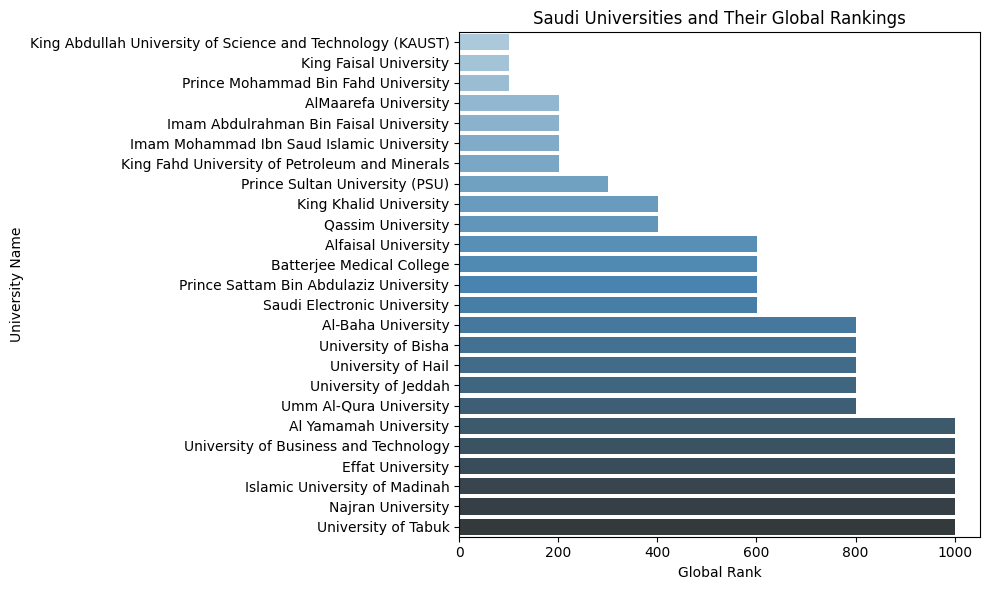

In [60]:
# Filter the universities in Saudi Arabia
saudi_universities1 = the_df[the_df['Location'] == 'Saudi Arabia'][['int_rank', 'University Name']]

# Create a seaborn bar plot for Saudi universities
plt.figure(figsize=(10, 6))
sns.barplot(x='int_rank', y='University Name', data=saudi_universities1, palette="Blues_d")

# Set plot labels and title
plt.xlabel('Global Rank')
plt.ylabel('University Name')
plt.title('Saudi Universities and Their Global Rankings')

# Show the plot
plt.tight_layout()
plt.show()


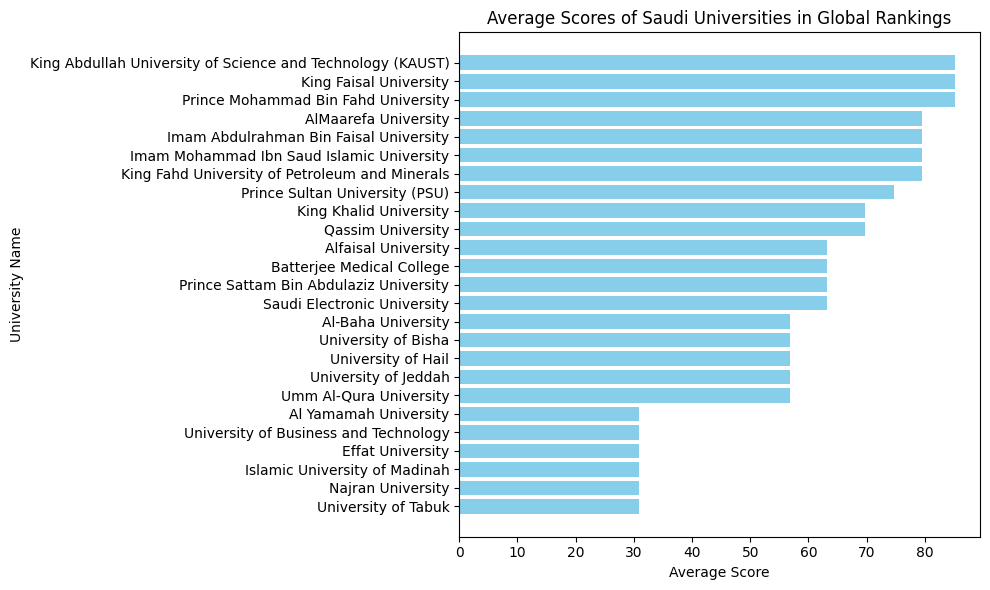

In [61]:
# Filter rows for universities located in Saudi Arabia
saudi_universities_sorted = the_df[the_df['Location'].str.contains('Saudi Arabia', na=False)]

# Create a bar plot for avg_score vs. University Name
plt.figure(figsize=(10, 6))
plt.barh(saudi_universities_sorted['University Name'], saudi_universities_sorted['avg_score'], color='skyblue')
plt.xlabel('Average Score')
plt.ylabel('University Name')
plt.title('Average Scores of Saudi Universities in Global Rankings')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest score at the top

# Display the plot
plt.tight_layout()
plt.show()


In [62]:
top_university_countries_sorted = top_university_countries.sort_values(by='Top 100 Universities', ascending=False)

# Re-create the bar plot with sorted columns
fig_sorted = px.bar(top_university_countries_sorted, x='Location', y='Top 100 Universities', 
                    title="Top 100 Universities by Country                                    Source: Times Higher Education",
                    labels={'Top 100 Universities': 'Number of Top 100 Universities', 'Location': 'Country'},
                    color='Top 100 Universities')

fig_sorted.show()